# Titanic Decision Tree

## Import libraries

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import dataset

In [325]:
titanic_df = pd.read_csv('data.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Get dataset basic information

In [326]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [327]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Remove nulls

In [328]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [329]:
titanic_df['Age'] = titanic_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
titanic_df['Embarked'] = titanic_df.groupby(['Pclass', 'Sex'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))
titanic_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## EDA

<Axes: xlabel='Pclass', ylabel='Survived'>

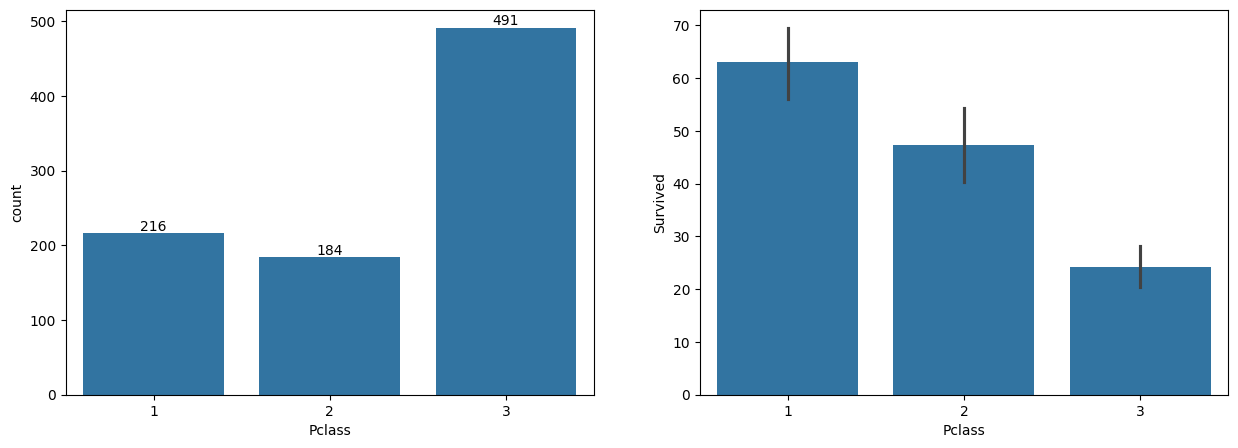

In [330]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(titanic_df, x='Pclass', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  titanic_df,
  x='Pclass',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<Axes: xlabel='SibSp', ylabel='Survived'>

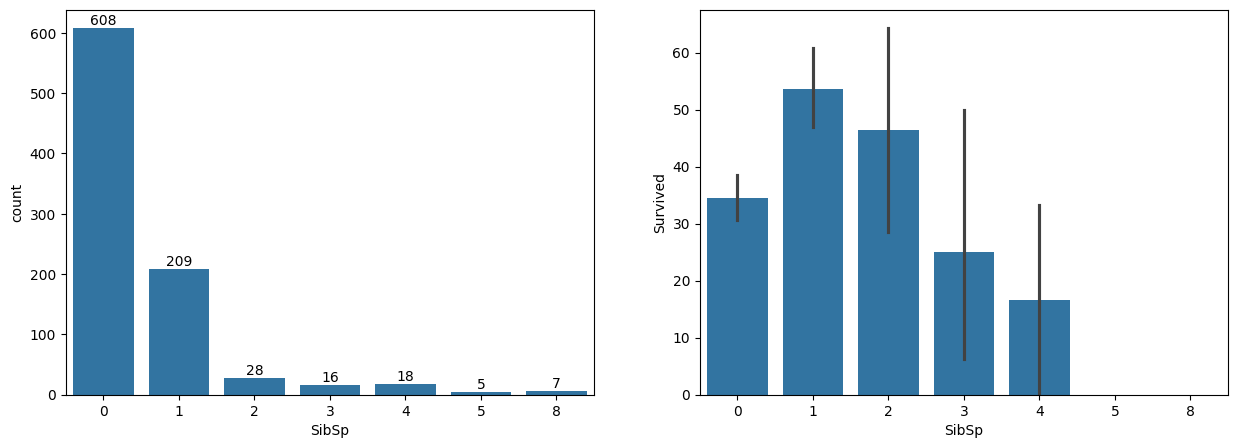

In [331]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(titanic_df, x='SibSp', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  titanic_df,
  x='SibSp',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<Axes: xlabel='Sex', ylabel='Survived'>

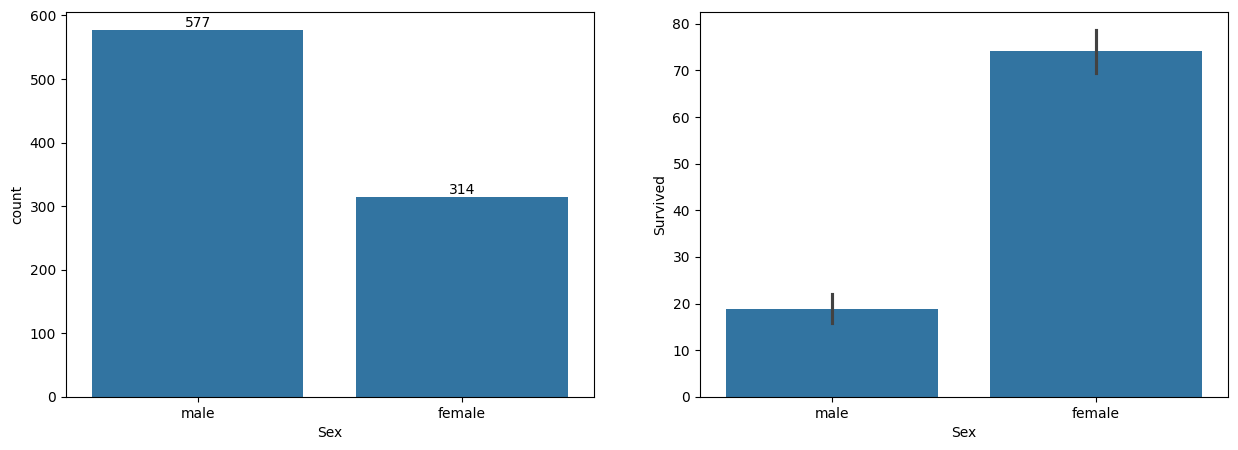

In [332]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(titanic_df, x='Sex', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  titanic_df,
  x='Sex',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<Axes: xlabel='Embarked', ylabel='Survived'>

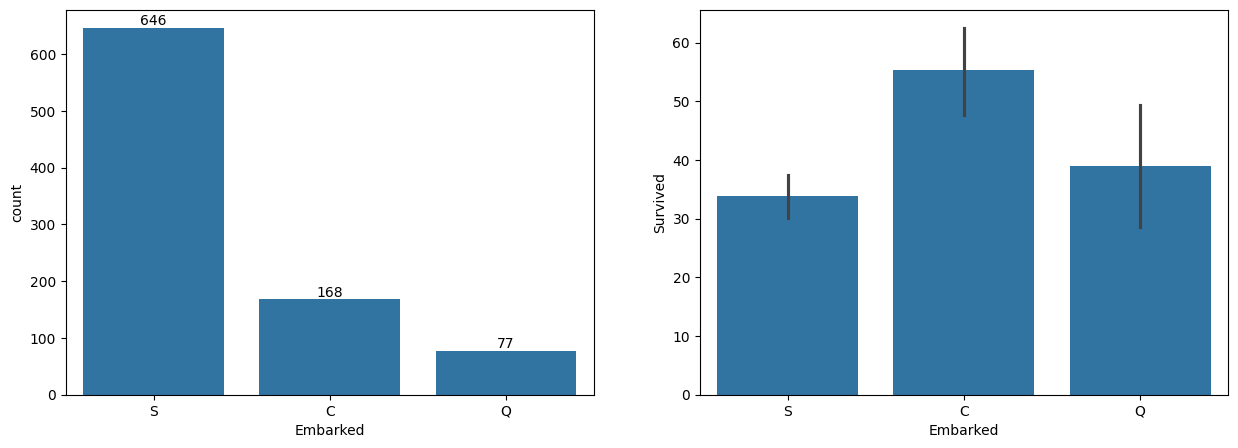

In [333]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
axis = sns.countplot(titanic_df, x='Embarked', ax=axes[0])
axis.bar_label(axis.containers[0])
sns.barplot(
  titanic_df,
  x='Embarked',
  y='Survived',
  estimator=lambda x: sum(x == 1) * 100.0 / len(x),
  ax=axes[1],
)

<Axes: xlabel='Age', ylabel='Count'>

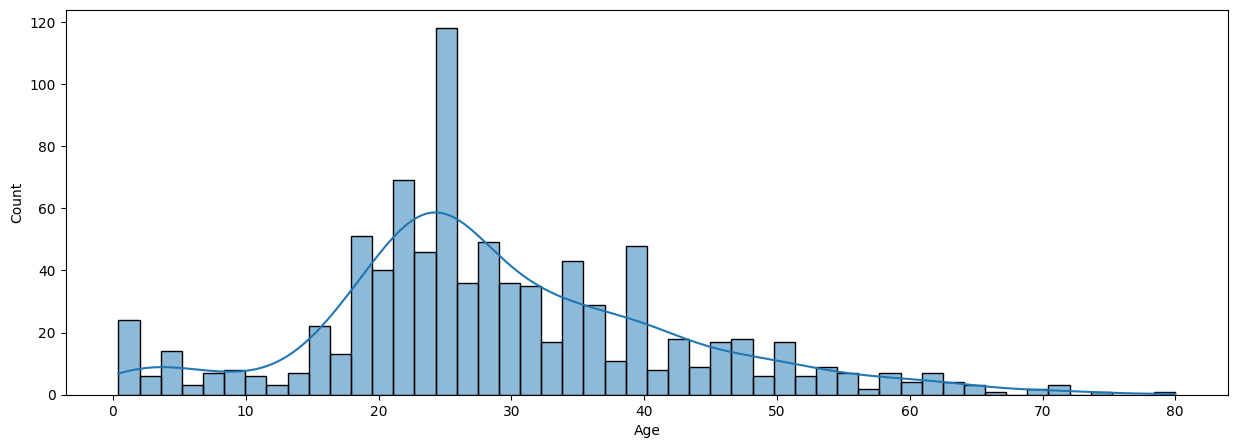

In [334]:
figure, axis = plt.subplots(1, 1, figsize=(15, 5))
sns.histplot(titanic_df, x='Age', bins=50, kde=True, ax=axis)

<Axes: xlabel='Sex', ylabel='Age'>

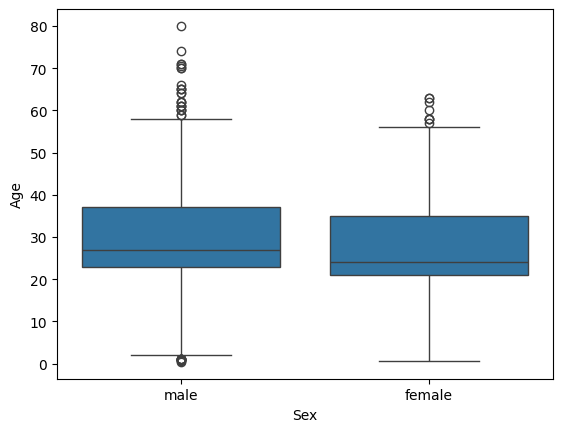

In [335]:
sns.boxplot(titanic_df, x='Sex', y='Age')

## Transform categorical data

In [336]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,21.5,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


## Separate dataframe into x and y tensors

In [337]:
x = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

## Split data into training and test tensors

In [338]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Create a decision tree model

In [339]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## Predict data

In [340]:
y_pred = model.predict(x_test)

## Calculate metrics

In [341]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7877094972067039
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Plot confusion matrix

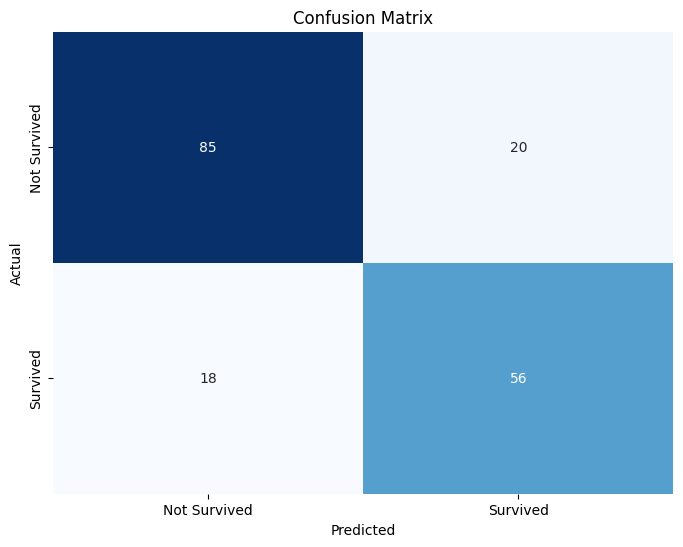

In [342]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
  cm,
  annot=True,
  fmt='d',
  cmap='Blues',
  cbar=False,
  xticklabels=['Not Survived', 'Survived'],
  yticklabels=['Not Survived', 'Survived'],
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Rank properties importance

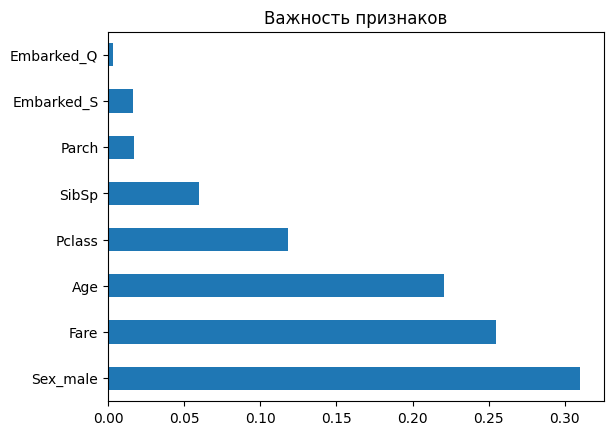

In [343]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Важность признаков')
plt.show()